# Benchmark results

This section investigates how scalable is our software. We report median run time, memory usage, and iteration number for our core functions `L0_normal_reg`, `L0_logistic_reg`, and `L0_poisson_reg` on 1 million SNPs with sample sizes ranging from 10000, 20000, ..., 120000 with 5 separate runs. Every run is performed on a intel-E5-2670 machine which has 63G of RAM and a single core 3.3GHz processor. 

In [1]:
using DelimitedFiles
using DataFrames
using Statistics
using Plots
using StatsPlots
using Measures

In [2]:
#specify directories for different benchmark results
dir_normal = "normal_results"
dir_normal_nodebias = "normal_results_nodebias"
dir_logistic = "logistic_results"
dir_logistic_nodebias = "logistic_results_nodebias"
dir_poisson = "poisson_results"
dir_poisson_nodebias = "poisson_results_nodebias"

all_dir = [dir_normal_nodebias; dir_normal; dir_logistic_nodebias; dir_logistic; 
        dir_poisson_nodebias; dir_poisson]

6-element Array{String,1}:
 "normal_results_nodebias"  
 "normal_results"           
 "logistic_results_nodebias"
 "logistic_results"         
 "poisson_results_nodebias" 
 "poisson_results"          

In [3]:
all_benchmark_results = Vector{Matrix}(undef, 6)
for k in 1:length(all_dir)
    dir = all_dir[k]
    cur_response = zeros(12, 3)
    for i in 1:12
        a_particular_run = DataFrame(time=Float64[], memory=Float64[], iteration=Float64[])
        for j in 1:5
            file_dir  = dir * "/" * string(10000i) * "_by_1000000_run$j"
            file_dir2 = dir * "/" * string(10000i + 300) * "_by_1000000_run$j"
            if isfile(file_dir)
                tmp_run = readdlm(file_dir, ',', header=true)
                tmp_run[1][1] = tmp_run[1][1] / tmp_run[1][3] #divide time by iteration number
                tmp_run[1][2] = tmp_run[1][2] / 1000 #converg MB to GB
                push!(a_particular_run, tmp_run[1])
            elseif isfile(file_dir2)
                tmp_run = readdlm(file_dir2, ',', header=true)
                tmp_run[1][1] = tmp_run[1][1] / tmp_run[1][3] #divide time by iteration number
                tmp_run[1][2] = tmp_run[1][2] / 1000 #converg MB to GB
                push!(a_particular_run, tmp_run[1])
            else
                println(string(10000i) * " run $j for " * dir * " does not exist")
            end
        end
        
        cur_response[i, 1] = median(a_particular_run[:, 1])
        cur_response[i, 2] = median(a_particular_run[:, 2])
        cur_response[i, 3] = median(a_particular_run[:, 3])
    end
    all_benchmark_results[k] = cur_response
end

40000 run 2 for poisson_results_nodebias does not exist
60000 run 5 for poisson_results_nodebias does not exist
70000 run 1 for poisson_results_nodebias does not exist
90000 run 4 for poisson_results_nodebias does not exist
120000 run 4 for poisson_results_nodebias does not exist
30000 run 3 for poisson_results does not exist
70000 run 4 for poisson_results does not exist


In [60]:
model_sizes = collect(10:10:120)
normal_results_nodebias = all_benchmark_results[1]
normal_results = all_benchmark_results[2]
logistic_results_nodebias = all_benchmark_results[3]
logistic_results = all_benchmark_results[4]
poisson_results_nodebias = all_benchmark_results[5]
poisson_results = all_benchmark_results[6]

[poisson_results[:, 3] poisson_results_nodebias[:, 3]]

12×2 Array{Float64,2}:
  24.0   23.0
  73.0   77.0
  35.0   72.0
  19.0   52.0
  41.0   43.0
 103.0  103.0
  12.0   21.0
   7.0   16.0
  17.0   26.0
  16.0   41.0
  13.0   23.0
  10.0   32.0

# Plot time/memory/iter, separating debias and no-debias

In [74]:
storage = 1000 .* model_sizes .* 10^7 * .2 .* 1.25e-10

no_debias_times = [normal_results_nodebias[:, 1] logistic_results_nodebias[:, 1] poisson_results_nodebias[:, 1]]
yes_debias_times = [normal_results[:, 1] logistic_results[:, 1] poisson_results[:, 1]]
no_debias_memory = [normal_results_nodebias[:, 2] logistic_results_nodebias[:, 2] poisson_results_nodebias[:, 2] storage]
yes_debias_memory = [normal_results[:, 2] logistic_results[:, 2] poisson_results[:, 2] storage]
no_debias_iter = [normal_results_nodebias[:, 3] logistic_results_nodebias[:, 3] poisson_results_nodebias[:, 3]]
yes_debias_iter = [normal_results[:, 3] logistic_results[:, 3] poisson_results[:, 3]]

12×3 Array{Float64,2}:
 3.0  5.0   24.0
 2.0  2.0   73.0
 2.0  7.0   35.0
 2.0  2.0   19.0
 3.0  4.0   41.0
 3.0  5.0  103.0
 2.0  3.0   12.0
 2.0  6.0    7.0
 2.0  6.0   17.0
 2.0  2.0   16.0
 3.0  6.0   13.0
 2.0  2.0   10.0

In [75]:
#(d) = yes debias, (nd) = no-debias

yes_debias_times_plot = plot(model_sizes, yes_debias_times, xlabel = "Sample Size (thousands)",
    ylabel = "CPU Time (seconds)", w=3, lab = ["normal (d)" "logistic (d)" "poisson (d)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1260),
    linestyle = [:solid :dash :dot], title = "Seconds per Iteration")

no_debias_times_plot = plot(model_sizes, no_debias_times, xlabel = "Sample Size (thousands)",
    ylabel = "CPU Time (seconds)", w=3, lab = ["normal (nd)" "logistic (nd)" "poisson (nd)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1260),
    linestyle = [:solid :dash :dot], title = "Seconds per Iteration")

yes_debias_memory_plot = plot(model_sizes, yes_debias_memory, xlabel = "Sample Size (thousands)",
    ylabel = "Memory (GB)", w=3, lab = ["normal (d)" "logistic (d)" "poisson (d)" "Data size"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), 
    linestyle = [:solid :dash :dot :dashdot], title = "Memory Usage")

no_debias_memory_plot = plot(model_sizes, no_debias_memory, xlabel = "Sample Size (thousands)",
    ylabel = "Memory (GB)", w=3, lab = ["normal (nd)" "logistic (nd)" "poisson (nd)" "Data size"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), 
    linestyle = [:solid :dash :dot :dashdot], title = "Memory Usage")

yes_debias_iter_plot = plot(model_sizes, yes_debias_iter, xlabel = "Sample Size (thousands)",
    ylabel = "Number of Iterations", w=3, lab = ["normal (d)" "logistic (d)" "poisson (d)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 130),
    linestyle = [:solid :dash :dot], title = "Number of Iterations")

no_debias_iter_plot = plot(model_sizes, no_debias_iter, xlabel = "Sample Size (thousands)",
    ylabel = "Number of Iterations", w=3, lab = ["normal (nd)" "logistic (nd)" "poisson (nd)"],
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 130),
    linestyle = [:solid :dash :dot], title = "Number of Iterations");

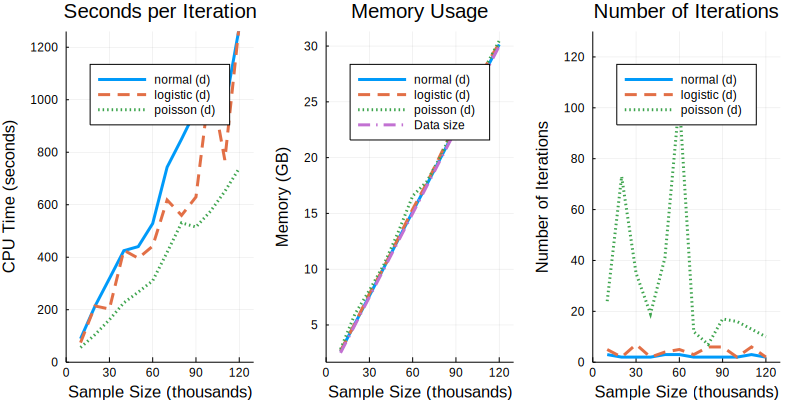

In [76]:
yes_debias_plots = [yes_debias_times_plot yes_debias_memory_plot yes_debias_iter_plot]
yes_debias = plot(yes_debias_plots..., layout = (1, 3), size = (800, 400))

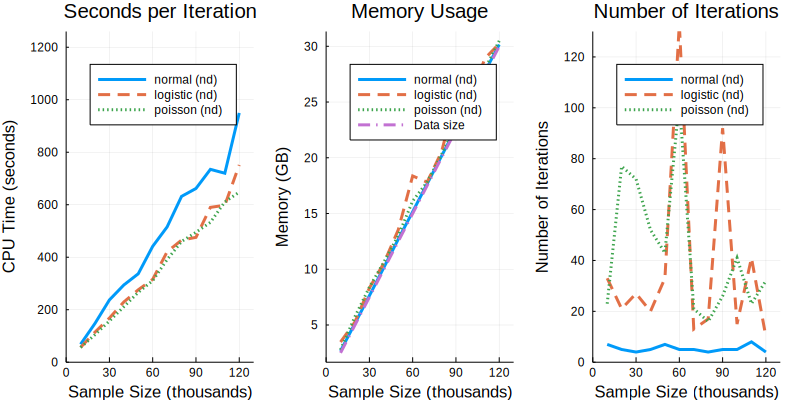

In [77]:
no_debias_plots = [no_debias_times_plot no_debias_memory_plot no_debias_iter_plot]
no_debias = plot(no_debias_plots..., layout = (1, 3), size = (800, 400))

# Save previous 2 plots in high resolution

In [79]:
yes_debias = plot(yes_debias_plots..., layout = (1, 3), size = (800, 400), dpi=300)
no_debias = plot(no_debias_plots..., layout = (1, 3), size = (800, 400), dpi=300)
savefig(yes_debias, "yes_debias")
savefig(no_debias, "no_debias")

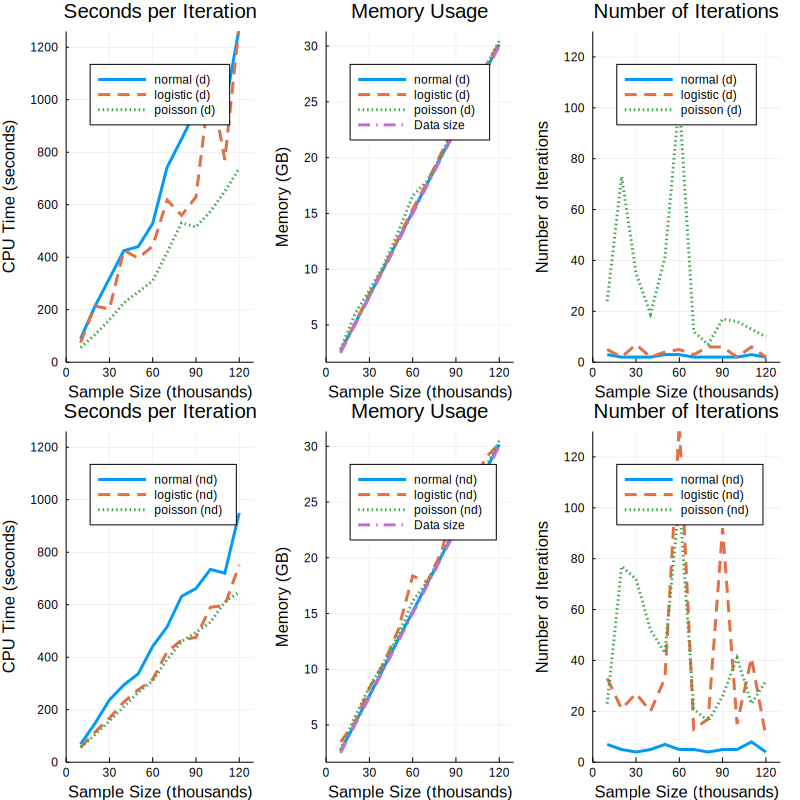

In [78]:
all_plots = [yes_debias_times_plot yes_debias_memory_plot yes_debias_iter_plot no_debias_times_plot no_debias_memory_plot no_debias_iter_plot]
plt = plot(all_plots..., layout = (2,3), size = (800, 800))

# Debias/no-debiasing in the same plot (looks like shit)

In [108]:
times = [normal_results_nodebias[:, 1] logistic_results_nodebias[:, 1] poisson_results_nodebias[:, 1] normal_results[:, 1] logistic_results[:, 1] poisson_results[:, 1]]
memory = [normal_results_nodebias[:, 2] logistic_results_nodebias[:, 2] poisson_results_nodebias[:, 2] normal_results[:, 2] logistic_results[:, 2] poisson_results[:, 2]]
iter = [normal_results_nodebias[:, 3] logistic_results_nodebias[:, 3] poisson_results_nodebias[:, 3] normal_results[:, 3] logistic_results[:, 3] poisson_results[:, 3]]


12×6 Array{Float64,2}:
 7.0   33.0   23.0  3.0  5.0   24.0
 5.0   21.0   77.0  2.0  2.0   73.0
 4.0   27.0   72.0  2.0  7.0   35.0
 5.0   20.0   52.0  2.0  2.0   19.0
 7.0   33.0   43.0  3.0  4.0   41.0
 5.0  133.0  103.0  3.0  5.0  103.0
 5.0   13.0   21.0  2.0  3.0   12.0
 4.0   17.0   16.0  2.0  6.0    7.0
 5.0   92.0   26.0  2.0  6.0   17.0
 5.0   15.0   41.0  2.0  2.0   16.0
 8.0   41.0   23.0  3.0  6.0   13.0
 4.0   10.0   32.0  2.0  2.0   10.0

In [111]:
model_sizes = collect(10:10:120)

#(nd) = no debias
#(d) = yes debias

times_plot = plot(model_sizes, times, xlabel = "Sample Size (thousands)",
    ylabel = "CPU Time (seconds)", w=3, xlim = (0, 130), title = "Seconds per Iteration",
    linestyle = [:solid :dash :dot :dashdot :dashdotdot :auto],
    lab = ["normal (nd)" "logistic (nd)" "poisson (nd)" "normal (d)" "logistic (d)" "poisson (d)"])

memory_plot = plot(model_sizes, memory, xlabel = "Sample Size (thousands)",
    ylabel = "Memory (MB)", w=3, title = "Memory Usage", xlim = (0, 130), 
    linestyle = [:solid :dash :dot :dashdot :dashdotdot :auto], 
    lab = ["normal (nd)" "logistic (nd)" "poisson (nd)" "normal (d)" "logistic (d)" "poisson (d)"])

iter_plot = plot(model_sizes, iter, xlabel = "Sample Size (thousands)",
    ylabel = "Number of Iterations", w=3, xlim = (0, 130), title = "Number of Iterations",
    linestyle = [:solid :dash :dot :dashdot :dashdotdot :auto],
    lab = ["normal (nd)" "logistic (nd)" "poisson (nd)" "normal (d)" "logistic (d)" "poisson (d)"]);

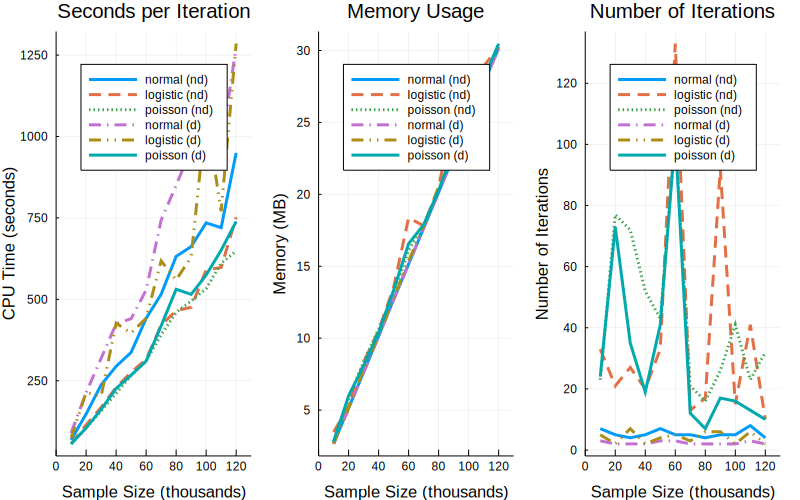

In [118]:
all_plots = [times_plot memory_plot iter_plot]
plt = plot(all_plots..., layout = (1, 3), size = (800, 500))